In [39]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon
from statannotations.Annotator import Annotator
import sys
sys.path.append('/home/local/VANDERBILT/litz/github/MASILab/lobe_seg')
from luna16_preprocess import get_kfolds

In [40]:
metric_dir = "/home/local/VANDERBILT/litz/data/luna16/metrics"
johof_folds = glob.glob(os.path.join(metric_dir, "johof_norm*"))
lsm_folds = glob.glob(os.path.join(metric_dir, "lsm_*"))
model_dir = "/home/local/VANDERBILT/litz/github/MASILab/lobe_seg/models/0418cv_luna16"
# model_dir = "/home/local/VANDERBILT/litz/github/MASILab/lobe_seg/models/0506cval"
al_model_dir = "/home/local/VANDERBILT/litz/github/MASILab/lobe_seg/models/0511cval"
kfolds_path = "/home/local/VANDERBILT/litz/data/luna16/5fold_qa.csv"
# kfolds_path = "/home/local/VANDERBILT/litz/data/imagevu/nifti/active_learning/dataset_rand/5folds.csv"
fold_paths = get_kfolds(kfolds_path)
unet3d_folds = []
for d, _, _ in os.walk(model_dir):
    unet3d_folds.extend(glob.glob(os.path.join(d, "*.csv")))
al_folds = []
for d, _, _ in os.walk(al_model_dir):
    al_folds.extend(glob.glob(os.path.join(d, "*.csv")))

johof_folds = sorted(johof_folds)
lsm_folds = sorted(lsm_folds)
unet3d_folds = sorted(unet3d_folds)
al_folds = sorted(al_folds)

In [41]:
unet3d_folds

['/home/local/VANDERBILT/litz/github/MASILab/lobe_seg/models/0418cv_luna16/fold1/test.csv',
 '/home/local/VANDERBILT/litz/github/MASILab/lobe_seg/models/0418cv_luna16/fold2/test.csv',
 '/home/local/VANDERBILT/litz/github/MASILab/lobe_seg/models/0418cv_luna16/fold3/test.csv',
 '/home/local/VANDERBILT/litz/github/MASILab/lobe_seg/models/0418cv_luna16/fold4/test.csv',
 '/home/local/VANDERBILT/litz/github/MASILab/lobe_seg/models/0418cv_luna16/fold5/test.csv']

In [48]:
# parse metric csv's into dataframes
johof_df = pd.read_csv(johof_folds[0])
johof_df["fold"] = int(johof_folds[0][-5])
# johof_df["path"] = fold_paths
for i, johof_fold in enumerate(johof_folds):
    if i > 0:
        johof_fold_df = pd.read_csv(johof_fold)
        johof_fold_df["fold"] = int(johof_fold[-5])
        johof_df = pd.concat([johof_df, johof_fold_df], ignore_index=True)
johof_df.drop(columns=['Unnamed: 0'], inplace=True)

lsm_df = pd.read_csv(lsm_folds[0])
lsm_df["fold"] = int(lsm_folds[0][-5])
for i, lsm_fold in enumerate(lsm_folds):
    if i > 0:
        lsm_fold_df = pd.read_csv(lsm_fold)
        lsm_fold_df["fold"] = int(lsm_fold[-5])
        lsm_df = pd.concat([lsm_df, lsm_fold_df], ignore_index=True)
lsm_df.drop(columns=['Unnamed: 0'], inplace=True)

unet_df = pd.read_csv(unet3d_folds[0])
unet_df["fold"] = int(unet3d_folds[0][-10])
for i, unet3d_fold in enumerate(unet3d_folds):
    if i > 0:
        unet_fold_df = pd.read_csv(unet3d_fold)
        unet_fold_df["fold"] = int(unet3d_fold[-10])
        unet_df = pd.concat([unet_df, unet_fold_df], ignore_index=True)
unet_df.drop(columns=['Unnamed: 0'], inplace=True)

al_df = pd.read_csv(al_folds[0])
al_df["fold"] = int(al_folds[0][-10])
for i, al_fold in enumerate(al_folds):
    if i > 0:
        al_fold_df = pd.read_csv(al_fold)
        al_fold_df["fold"] = int(al_fold[-10])
        al_df = pd.concat([al_df, al_fold_df], ignore_index=True)
al_df.drop(columns=['Unnamed: 0'], inplace=True)

# convert index to column to identify subjects
johof_df['id'] = johof_df.index
lsm_df['id'] = lsm_df.index
unet_df['id'] = unet_df.index
al_df['id'] = al_df.index
al_df

,0,1,2,3,4,input_path,fold,id
0,0.973187,0.973336,0.942895,0.784275,0.925650,/home/local/VANDERBILT/litz/data/luna16/preproc_qa/1.3.6.1.4.1.14519.5.2.1.6279.6001.183843376225716802567192412456.mhd,1,0
1,0.980912,0.975926,0.956717,0.907810,0.966566,/home/local/VANDERBILT/litz/data/luna16/preproc_qa/1.3.6.1.4.1.14519.5.2.1.6279.6001.249530219848512542668813996730.mhd,1,1
2,0.965828,0.977428,0.963507,0.923020,0.976666,/home/local/VANDERBILT/litz/data/luna16/preproc_qa/1.3.6.1.4.1.14519.5.2.1.6279.6001.316911475886263032009840828684.mhd,1,2
3,0.938645,0.941528,0.939121,0.828809,0.960739,/home/local/VANDERBILT/litz/data/luna16/preproc_qa/1.3.6.1.4.1.14519.5.2.1.6279.6001.177685820605315926524514718990.mhd,1,3
4,0.978514,0.973776,0.965877,0.905593,0.938307,/home/local/VANDERBILT/litz/data/luna16/preproc_qa/1.3.6.1.4.1.14519.5.2.1.6279.6001.119806527488108718706404165837.mhd,1,4
5,0.972280,0.955014,0.916108,0.876051,0.953693,/home/local/VANDERBILT/litz/data/luna16/preproc_qa/1.3.6.1.4.1.14519.5.2.1.6279.6001.898642529028521482602829374444.mhd,1,5
6,0.958387,0.965080,0.907087,0.810034,0.958855,/home/local/VANDERBILT/litz/data/luna16/preproc_qa/1.3.6.1.4.1.14519.5.2.1.6279.6001.134638281277099121660656324702.mhd,1,6
7,0.983587,0.975007,0.854607,0.626814,0.938171,/home/local/VANDERBILT/litz/data/luna16/preproc_qa/1.3.6.1.4.1.14519.5.2.1.6279.6001.416701701108520592702405866796.mhd,1,7
8,0.958783,0.971184,0.955116,0.925498,0.970864,/home/local/VANDERBILT/litz/data/luna16/preproc_qa/1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800.mhd,1,8
9,0.956329,0.920102,0.951873,0.901483,0.938183,/home/local/VANDERBILT/litz/data/luna16/preproc_qa/1.3.6.1.4.1.14519.5.2.1.6279.6001.503980049263254396021509831276.mhd,2,9


In [43]:
pd.set_option('display.max_colwidth', None)
a = unet_df[(unet_df['3']<=0.7)]
a

,0,1,2,3,4,fold,id
7,0.982587,0.977613,0.810987,0.403589,0.863097,1,7
11,0.973115,0.970006,0.796379,0.006721,0.763605,2,11
12,0.977259,0.966001,0.891078,0.698945,0.920085,2,12
23,0.985087,0.982896,0.894620,0.539411,0.962576,3,23
36,0.955214,0.960188,0.487981,0.208114,0.949608,5,36


In [49]:
# function that maps an input int (as str type) to name of lobe
def lobe_map(x):
    if x=='0': return 'LUL'
    if x=='1': return 'LLL'
    if x=='2': return 'RUL'
    if x=='3': return 'RML'
    if x=='4': return 'RLL'

In [66]:
# johof_df['id'] = pd.Series(range(0, len(johof_df)))
# lsm_df['id'] = pd.Series(range(0, len(lsm_df)))
# unet_df['id'] = pd.Series(range(0, len(unet_df)))
# convert wide to long form
johof_long = pd.melt(johof_df, id_vars=['id', 'fold'], value_vars=['0', '1', '2', '3', '4'])
johof_long['model'] = 'Hof.'
lsm_long = pd.melt(lsm_df, id_vars=['id', 'fold'], value_vars=['0', '1', '2', '3', '4'])
lsm_long['model'] = 'LSM'
unet_long = pd.melt(unet_df, id_vars=['id', 'fold'], value_vars=['0', '1', '2', '3', '4'])
unet_long['model'] = '3DUnet'
al_long = pd.melt(al_df, id_vars=['id', 'fold'], value_vars=['0', '1', '2', '3', '4'])
al_long['model'] = 'AL'

all_df = pd.concat([johof_long, lsm_long, unet_long, al_long], ignore_index=True)
# # convert lobe numbers to names
all_df = all_df.rename(columns={'variable':'Lobe', 'value': 'Dice score'})
all_df['Lobe'] = all_df['Lobe'].apply(lobe_map)


In [64]:
all_df

,id,fold,Lobe,Dice score,model
0,0,1,LUL,0.908171,Hof.
1,1,1,LUL,0.949562,Hof.
2,2,1,LUL,0.936145,Hof.
3,3,1,LUL,0.904868,Hof.
4,4,1,LUL,0.956015,Hof.
...,...,...,...,...,...
935,42,5,RLL,0.975286,AL
936,43,5,RLL,0.948071,AL
937,44,5,RLL,0.976631,AL
938,45,5,RLL,0.980709,AL


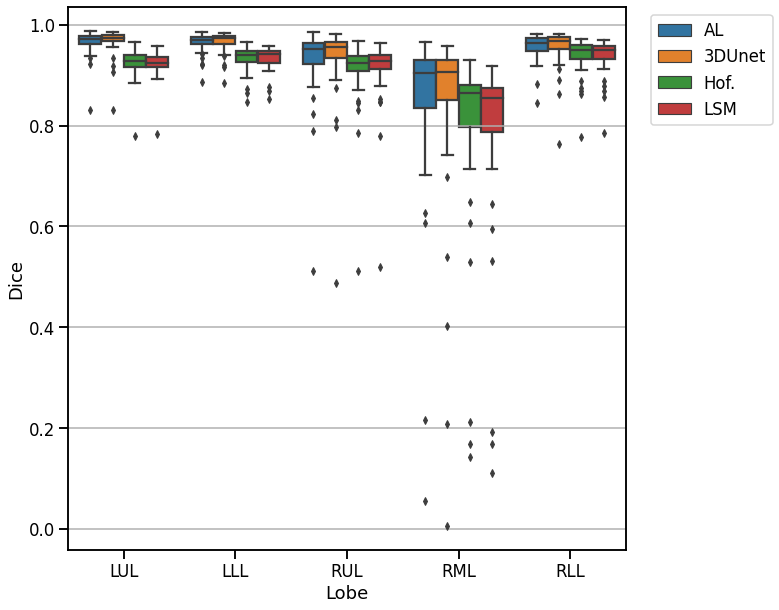

In [67]:
sns.set_context(context="talk")
hue = "model"
hue_order = ['AL', '3DUnet', 'Hof.', 'LSM']
order = ['LUL', 'LLL', 'RUL', 'RML', 'RLL']
f, ax = plt.subplots(figsize=(10, 10))
bplot = sns.boxplot(data=all_df, x="Lobe", y="Dice score", 
                    order=order, hue="model", hue_order=hue_order)
bplot.set(xlabel="Lobe", ylabel="Dice")
ax.yaxis.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

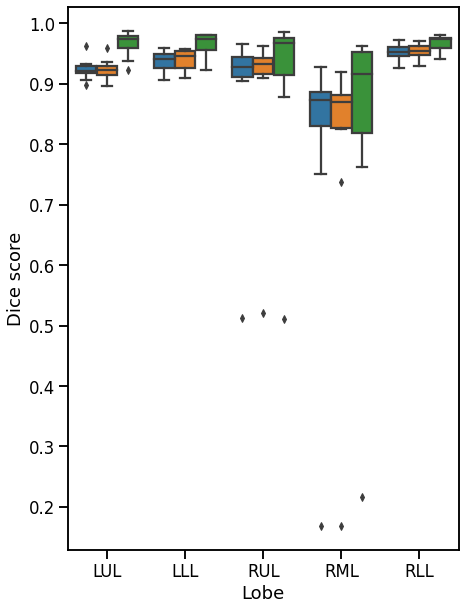

In [32]:
f, ax = plt.subplots(figsize=(7, 10))
b = sns.boxplot(x="Lobe", y="Dice score", data=all_df[all_df["fold"]==5], hue="model", orient="v")
ax.get_legend().remove()

### Analysis
On average, the RML is segmented worse with Johof and LSM. There are 6 cases where the RML segmentation score falls well below the 1st quartile of 0.78 dice score.

    fold        model  Dice score
0      1       3DUnet    0.925950
1      1  Hof. 2DUnet    0.892446
2      1          LSM    0.889162
3      2       3DUnet    0.922217
4      2  Hof. 2DUnet    0.890935
5      2          LSM    0.886997
6      3       3DUnet    0.936483
7      3  Hof. 2DUnet    0.900576
8      3          LSM    0.901110
9      4       3DUnet    0.948421
10     4  Hof. 2DUnet    0.913317
11     4          LSM    0.912543
12     5       3DUnet    0.934897
13     5  Hof. 2DUnet    0.900670
14     5          LSM    0.900750


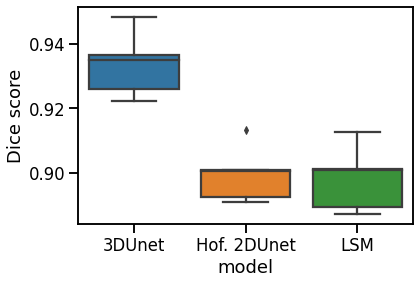

In [100]:
# mean dice across folds


3dunet, hof: 15.0, 0.03125
3dunet, lsm: 8.0, 0.5
lsm, hof: 0.0, 0.0625
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

AL vs. 3DUnet: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=1.200e+01
3DUnet vs. Hof.: Mann-Whitney-Wilcoxon test two-sided, P_val:7.937e-03 U_stat=2.500e+01
Hof. vs. LSM: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=1.300e+01
3DUnet vs. LSM: Mann-Whitney-Wilcoxon test two-sided, P_val:7.937e-03 U_stat=2.500e+01


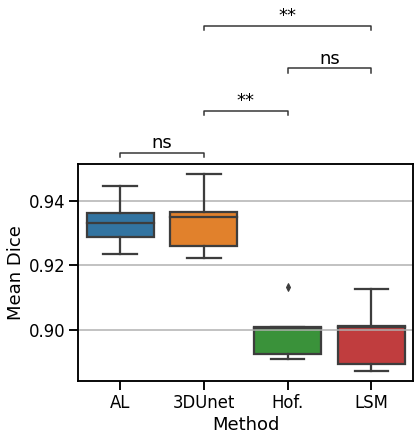

In [68]:
# paired wilcoxon signed rank test of mean fold performance between methods
# H0 = no difference in mean performance between two methods
mean_df = all_df.groupby(["fold", "model"], as_index=False).agg({"Dice score": "mean"})
mean_3dunet = mean_df[mean_df["model"]=="3DUnet"]["Dice score"].values
mean_hof = mean_df[mean_df["model"]=="Hof."]["Dice score"].values
mean_lsm = mean_df[mean_df["model"]=="LSM"]["Dice score"].values
mean_lsm = mean_df[mean_df["model"]=="AL"]["Dice score"].values

w, p = wilcoxon(mean_3dunet, mean_hof, alternative="greater")
print(f'3dunet, hof: {w}, {p}')
w, p = wilcoxon(mean_3dunet, mean_lsm, alternative="greater")
print(f'3dunet, lsm: {w}, {p}')
w, p = wilcoxon(mean_lsm, mean_hof, alternative="two-sided")
print(f'lsm, hof: {w}, {p}')


# plot stat significance
order = ['AL', '3DUnet', 'Hof.', 'LSM']
pairs = [('AL', '3DUnet'), ('3DUnet', 'Hof.'), ('3DUnet', 'LSM'), ('Hof.', 'LSM')]

f, ax = plt.subplots()
bplot = sns.boxplot(x="model", y="Dice score", data=mean_df, orient="v", order=order, hue_order=order)
bplot.set(xlabel="Method", ylabel="Mean Dice")
ax.yaxis.grid(True)
annotator = Annotator(bplot, pairs, data=mean_df, x="model", y="Dice score", order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
annotator.apply_test()
bplot, test_results = annotator.annotate()


In [12]:
print(np.mean(mean_3dunet), np.std(mean_3dunet))
print(np.mean(mean_hof), np.std(mean_hof))
print(np.mean(mean_lsm), np.std(mean_lsm))

0.9016727243920087 0.014092195384838985
0.899588673179798 0.007956316891953082
0.8981122792105051 0.00925036944837333


3dunet, hof: 26561.0, 2.2596638691373657e-34
3dunet, lsm: 26554.0, 2.4531955297264763e-34
lsm, hof: 12289.0, 0.13087978218882843
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

RUL_Hof. vs. RUL_LSM: Mann-Whitney-Wilcoxon test two-sided, P_val:7.565e-01 U_stat=1.063e+03
RML_Hof. vs. RML_LSM: Mann-Whitney-Wilcoxon test two-sided, P_val:4.141e-01 U_stat=1.213e+03
RML_AL vs. RML_3DUnet: Mann-Whitney-Wilcoxon test two-sided, P_val:7.738e-01 U_stat=1.066e+03
RLL_3DUnet vs. RLL_Hof.: Mann-Whitney-Wilcoxon test two-sided, P_val:1.869e-05 U_stat=1.671e+03
RLL_AL vs. RLL_3DUnet: Mann-Whitney-Wilcoxon test two-sided, P_val:6.664e-01 U_stat=1.047e+03
LLL_Hof. vs. LLL_LSM: Mann-Whitney-Wilcoxon test two-sided, P_val:6.284e-01 U_stat=1.040e+03
RUL_AL vs. RUL_3DUnet: Mann-Whitney-Wilcoxon test two-sided, P_val:5.706e-01 U_stat=1.029e+03
LUL_Hof. vs. LUL_LSM: Mann-Whitne

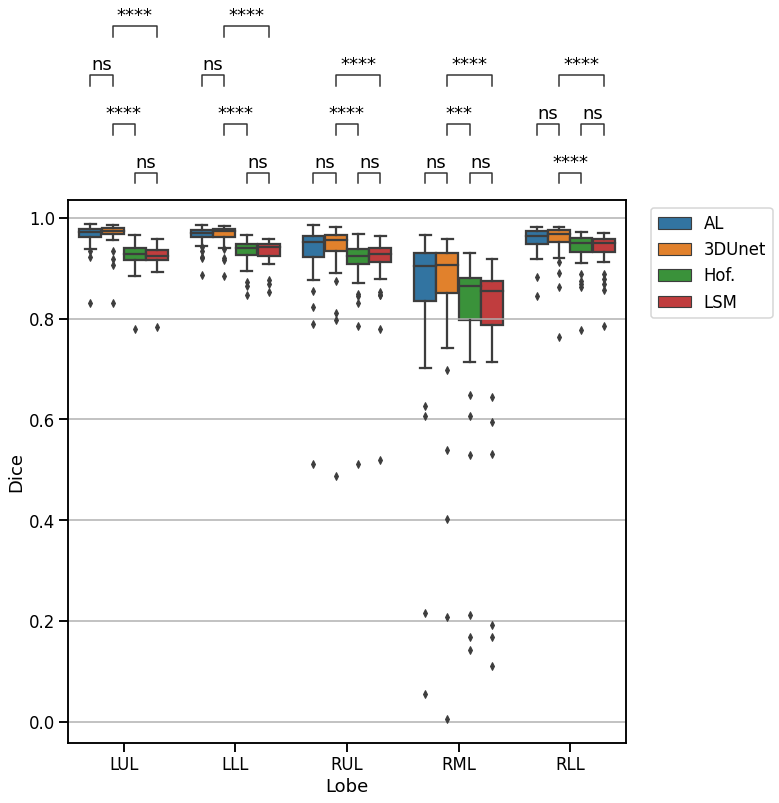

In [72]:
# paired wilcoxon signed rank test of performance on individual lobes for all examples
all_sorted = all_df.sort_values(["id", "model", "Lobe"])
# print(all_sorted[:30])
all_3dunet = all_sorted[all_sorted["model"]=="3DUnet"]["Dice score"].values
all_hof = all_sorted[all_sorted["model"]=="Hof."]["Dice score"].values
all_lsm = all_sorted[all_sorted["model"]=="LSM"]["Dice score"].values

w, p = wilcoxon(all_3dunet, all_hof, alternative="greater")
print(f'3dunet, hof: {w}, {p}')
w, p = wilcoxon(all_3dunet, all_lsm, alternative="greater")
print(f'3dunet, lsm: {w}, {p}')
w, p = wilcoxon(all_hof, all_lsm, alternative="two-sided")
print(f'lsm, hof: {w}, {p}')

hue = "model"
hue_order = ['AL', '3DUnet', 'Hof.', 'LSM']
order = ['LUL', 'LLL', 'RUL', 'RML', 'RLL']
f, ax = plt.subplots(figsize=(10, 10))
bplot = sns.boxplot(data=all_sorted, x="Lobe", y="Dice score", 
                    order=order, hue="model", hue_order=hue_order)
bplot.set(xlabel="Lobe", ylabel="Dice")
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
ax.yaxis.grid(True)
# plot stat significance
pairs=[(('LUL', '3DUnet'), ('LUL', 'Hof.')),
       (('LUL', '3DUnet'), ('LUL', 'LSM')),
       (('LUL', 'Hof.'), ('LUL', 'LSM')),
       (('LUL', 'AL'), ('LUL', '3DUnet')),
       (('LLL', '3DUnet'), ('LLL', 'Hof.')),
       (('LLL', '3DUnet'), ('LLL', 'LSM')),
       (('LLL', 'Hof.'), ('LLL', 'LSM')),
       (('LLL', 'AL'), ('LLL', '3DUnet')),
       (('RUL', '3DUnet'), ('RUL', 'Hof.')),
       (('RUL', '3DUnet'), ('RUL', 'LSM')),
       (('RUL', 'Hof.'), ('RUL', 'LSM')),
       (('RUL', 'AL'), ('RUL', '3DUnet')),
       (('RML', '3DUnet'), ('RML', 'Hof.')),
       (('RML', '3DUnet'), ('RML', 'LSM')),
       (('RML', 'Hof.'), ('RML', 'LSM')),
       (('RML', 'AL'), ('RML', '3DUnet')),
       (('RLL', '3DUnet'), ('RLL', 'Hof.')),
       (('RLL', '3DUnet'), ('RLL', 'LSM')),
       (('RLL', 'Hof.'), ('RLL', 'LSM')),
       (('RLL', 'AL'), ('RLL', '3DUnet')),
      ]
annotator = Annotator(bplot, pairs, data=all_sorted, x="Lobe", y="Dice score", 
                      order=order, hue=hue, hue_order=hue_order)
annotator.configure(test='Mann-Whitney', text_format='star', loc="outside", verbose=2)
annotator.apply_test()
bplot, test_results = annotator.annotate()


3dunet, hof: 1109.0, 4.028141048819464e-09
3dunet, lsm: 1118.0, 2.2795293817802552e-09
lsm, hof: 479.0, 0.36839518598509047
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_Hof. 2DUnet vs. 2_LSM: Mann-Whitney-Wilcoxon test two-sided, P_val:6.455e-01 U_stat=1.070e+03
3_3DUnet vs. 3_Hof. 2DUnet: Mann-Whitney-Wilcoxon test two-sided, P_val:7.681e-05 U_stat=1.503e+03
3_Hof. 2DUnet vs. 3_LSM: Mann-Whitney-Wilcoxon test two-sided, P_val:7.900e-01 U_stat=9.790e+02
4_3DUnet vs. 4_Hof. 2DUnet: Mann-Whitney-Wilcoxon test two-sided, P_val:2.646e-06 U_stat=1.595e+03
4_Hof. 2DUnet vs. 4_LSM: Mann-Whitney-Wilcoxon test two-sided, P_val:9.742e-01 U_stat=1.017e+03
5_3DUnet vs. 5_Hof. 2DUnet: Mann-Whitney-Wilcoxon test two-sided, P_val:1.344e-07 U_stat=2.395e+03
5_Hof. 2DUnet vs. 5_LSM: Mann-Whitney-Wilcoxon test two-sided, P_val:8.064e-01 U_stat=1.471e+03
1_3DUnet vs. 1

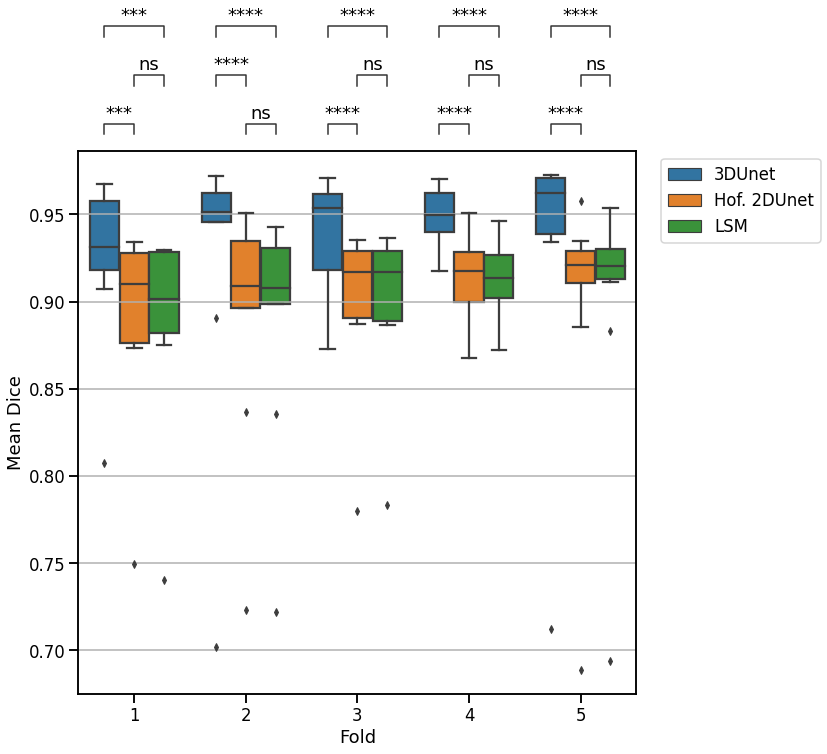

In [176]:
# test of performance on mean across lobes for all examples
all_mean = all_sorted.groupby(['id', 'model', 'fold'], as_index=False).mean()
all_mean_3dunet = all_mean[all_mean["model"]=="3DUnet"]["Dice score"].values
all_mean_hof = all_mean[all_mean["model"]=="Hof. 2DUnet"]["Dice score"].values
all_mean_lsm = all_mean[all_mean["model"]=="LSM"]["Dice score"].values

w, p = wilcoxon(all_mean_3dunet, all_mean_hof, alternative="greater")
print(f'3dunet, hof: {w}, {p}')
w, p = wilcoxon(all_mean_3dunet, all_mean_lsm, alternative="greater")
print(f'3dunet, lsm: {w}, {p}')
w, p = wilcoxon(all_mean_hof, all_mean_lsm, alternative="two-sided")
print(f'lsm, hof: {w}, {p}')

hue = "model"
hue_order = ['3DUnet', 'Hof. 2DUnet', 'LSM']
order = [1,2,3,4,5]
f, ax = plt.subplots(figsize=(10, 10))
bplot = sns.boxplot(data=all_mean, x="fold", y="Dice score", order=order, hue=hue, hue_order=hue_order)
bplot.set(xlabel="Fold", ylabel="Mean Dice")
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
ax.yaxis.grid(True)
# plot stat significance
pairs=[((1, '3DUnet'), (1, 'Hof. 2DUnet')),
       ((1, '3DUnet'), (1, 'LSM')),
       ((1, 'Hof. 2DUnet'), (1, 'LSM')),
       ((2, '3DUnet'), (2, 'Hof. 2DUnet')),
       ((2, '3DUnet'), (2, 'LSM')),
       ((2, 'Hof. 2DUnet'), (2, 'LSM')),
       ((3, '3DUnet'), (3, 'Hof. 2DUnet')),
       ((3, '3DUnet'), (3, 'LSM')),
       ((3, 'Hof. 2DUnet'), (3, 'LSM')),
       ((4, '3DUnet'), (4, 'Hof. 2DUnet')),
       ((4, '3DUnet'), (4, 'LSM')),
       ((4, 'Hof. 2DUnet'), (4, 'LSM')),
       ((5, '3DUnet'), (5, 'Hof. 2DUnet')),
       ((5, '3DUnet'), (5, 'LSM')),
       ((5, 'Hof. 2DUnet'), (5, 'LSM')),
]
annotator = Annotator(bplot, pairs, data=all_sorted, x="fold", y="Dice score", 
                      order=order, hue=hue, hue_order=hue_order)
annotator.configure(test='Mann-Whitney', text_format='star', loc="outside",verbose=2)
annotator.apply_test()
bplot, test_results = annotator.annotate()

In [14]:
metrics_df = pd.read_csv(metrics_path)
metrics_df = metrics_df.iloc[:, 1:]
a = metrics_df.mean(axis=0)
print(a)
print(a.mean())

0    0.971272
1    0.974861
2    0.958679
3    0.935657
4    0.975020
dtype: float64
0.9630977770285714


In [ ]:
emp_path = ""
emp_df = pd.read_csv(emp_path)